# Step 1: Install Dependencies

In [1]:
# Step 1: Install Dependencies
!pip install pandas matplotlib seaborn scikit-learn -q

# Step 2: Import Libraries

In [2]:
# Step 2: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, Dropout, Bidirectional
from tensorflow.keras.models import load_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils import class_weight

# Step 3: Load Dataset


🔢 Class Distribution:
label
2    373
0    141
1     28
Name: count, dtype: int64


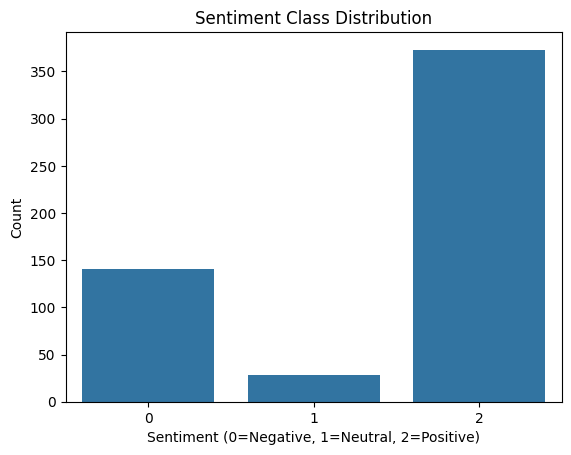

In [4]:
# Step 3: Load Dataset
df = pd.read_csv('/content/coffee.csv')  # Replace with your actual dataset path
df.dropna(inplace=True)

# Map stars to sentiment labels
def map_sentiment(stars):
    if stars <= 2:
        return 0  # Negative
    elif stars == 3:
        return 1  # Neutral
    else:
        return 2  # Positive

df['label'] = df['stars'].apply(map_sentiment)
df = df[['reviews', 'label']]

# 🆕 Check class distribution
print("\n🔢 Class Distribution:")
print(df['label'].value_counts())
sns.countplot(x='label', data=df)
plt.title("Sentiment Class Distribution")
plt.xlabel("Sentiment (0=Negative, 1=Neutral, 2=Positive)")
plt.ylabel("Count")
plt.show()

# Step 4: Tokenization

In [5]:
# Step 4: Tokenization
max_words = 15000
max_len = 150

tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(df['reviews'])

sequences = tokenizer.texts_to_sequences(df['reviews'])
padded = pad_sequences(sequences, maxlen=max_len)

X = padded
y = df['label'].values


# Step 5: Train/Test Split

In [6]:
# Step 5: Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🆕 Compute class weights to fix imbalance
class_weights = class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights = dict(enumerate(class_weights))

# Step 6: Build Model

In [7]:
# Step 6: Build Model
model = Sequential([
    Embedding(max_words, 64, input_length=max_len),
    Bidirectional(SimpleRNN(64, return_sequences=False)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

# Step 7: Train Model

In [15]:
# Step 7: Train Model
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.1, class_weight=class_weights)

Epoch 1/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step - accuracy: 1.0000 - loss: 0.0121 - val_accuracy: 0.5000 - val_loss: 1.5404
Epoch 2/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - accuracy: 1.0000 - loss: 0.0085 - val_accuracy: 0.5227 - val_loss: 1.5059
Epoch 3/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 108ms/step - accuracy: 1.0000 - loss: 0.0074 - val_accuracy: 0.5000 - val_loss: 1.5949
Epoch 4/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 151ms/step - accuracy: 1.0000 - loss: 0.0058 - val_accuracy: 0.4545 - val_loss: 1.6863
Epoch 5/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 105ms/step - accuracy: 1.0000 - loss: 0.0042 - val_accuracy: 0.4545 - val_loss: 1.7929


# Step 8: Evaluate Model

In [16]:
# Step 8: Evaluate Model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"\n✅ Accuracy on Test Set: {accuracy:.2f}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5769 - loss: 1.7387

✅ Accuracy on Test Set: 0.54


# Step 9: Classification Report & Confusion Matrix

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step

📊 Classification Report:
              precision    recall  f1-score   support

    Negative       0.30      0.23      0.26        30
     Neutral       0.00      0.00      0.00         3
    Positive       0.71      0.68      0.70        76

    accuracy                           0.54       109
   macro avg       0.34      0.31      0.32       109
weighted avg       0.58      0.54      0.56       109



/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129518 (\N{ABACUS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


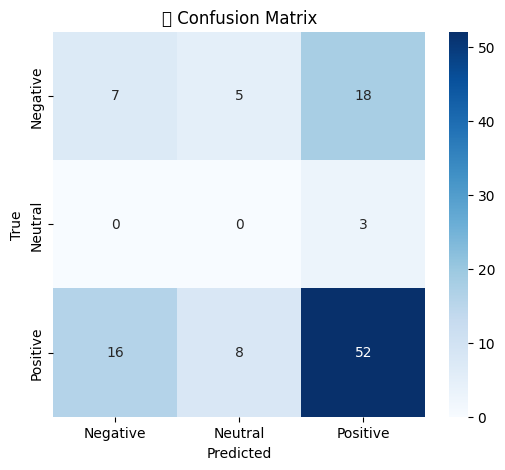

In [17]:

# Step 9: Classification Report & Confusion Matrix
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

print("\n📊 Classification Report:")
print(classification_report(y_test, y_pred_classes, target_names=["Negative", "Neutral", "Positive"]))

cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Neutral", "Positive"], yticklabels=["Negative", "Neutral", "Positive"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("🧮 Confusion Matrix")
plt.show()

# Step 10: Save Model (.keras) and Tokenizer (.pkl)

In [18]:
# Step 10: Save Model (.keras) and Tokenizer (.pkl)
model.save("rnn_sentiment_model.keras")  # 🔁 CHANGED: Save model as .keras
with open('tokenizer.pkl', 'wb') as f:
    pickle.dump(tokenizer, f)

print("\n💾 Model and tokenizer saved successfully!")


💾 Model and tokenizer saved successfully!
